In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.shape

(200, 5)

In [9]:
df = df.drop_duplicates()


# EDA

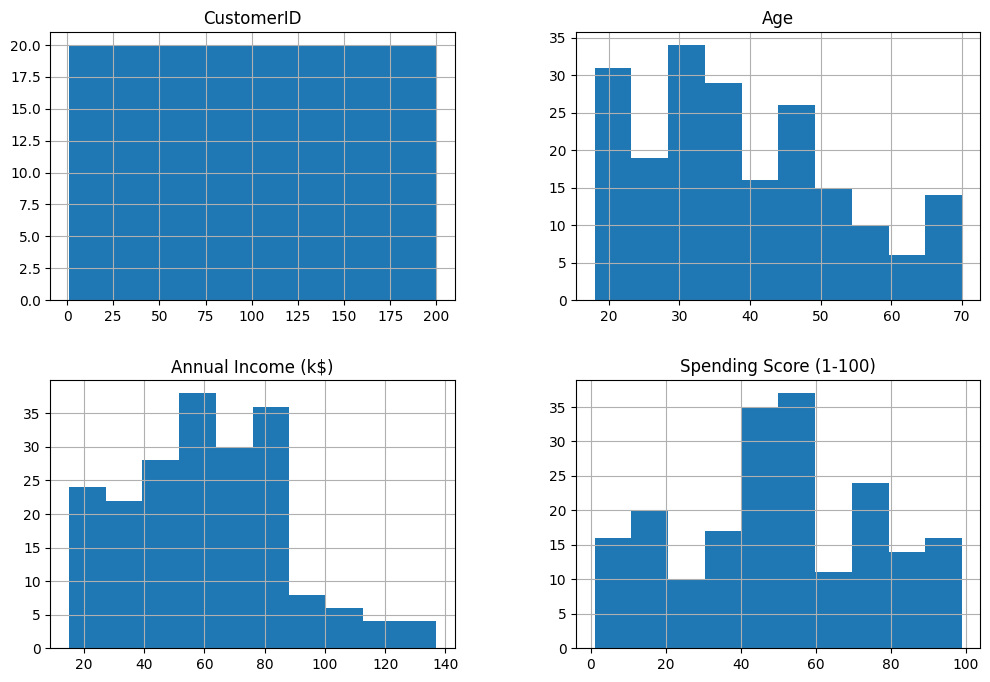

In [10]:
df.hist(figsize=(12,8))
plt.show()


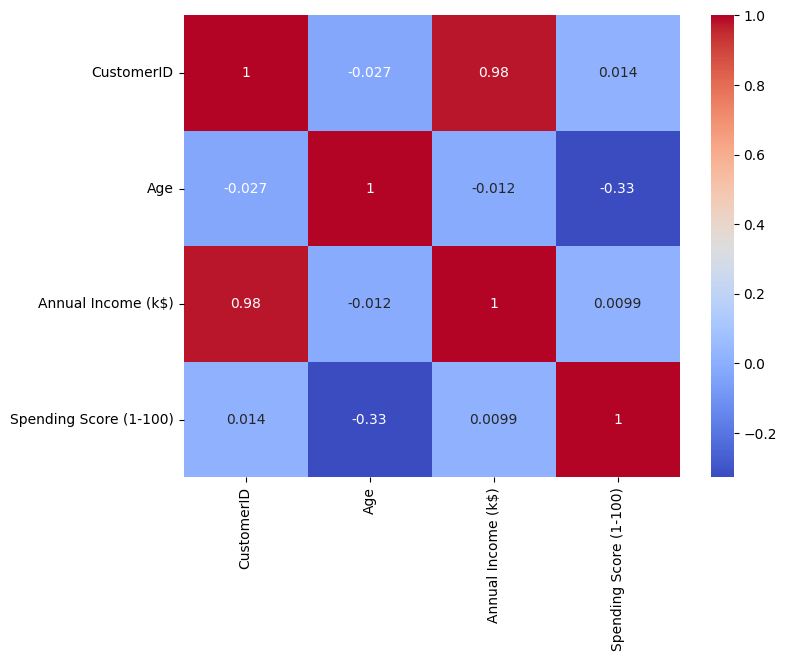

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']].corr(), annot=True, cmap="coolwarm")
plt.show()


In [13]:
# Feature Selection
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [14]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


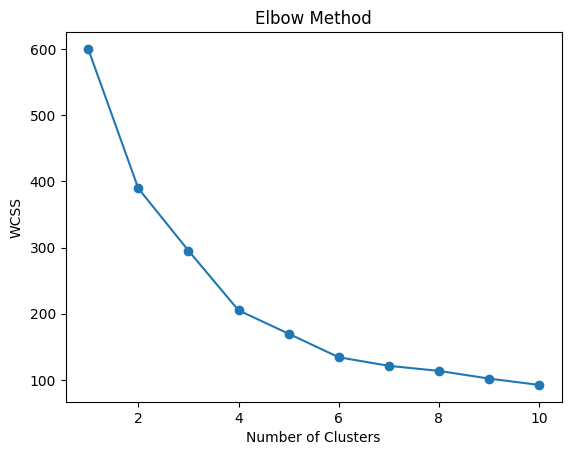

In [15]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [28]:
#Apply kmean clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


In [29]:
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.43106526216603014


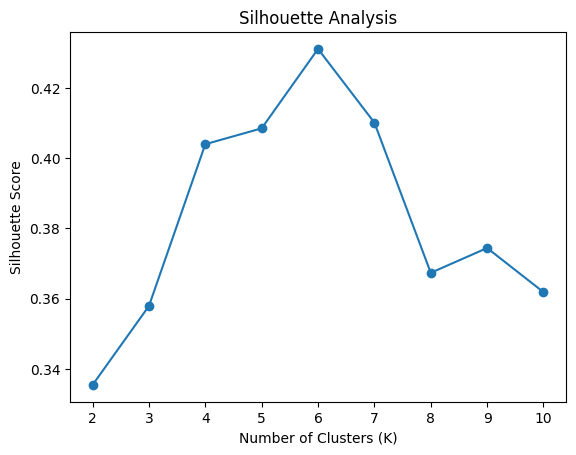

In [30]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


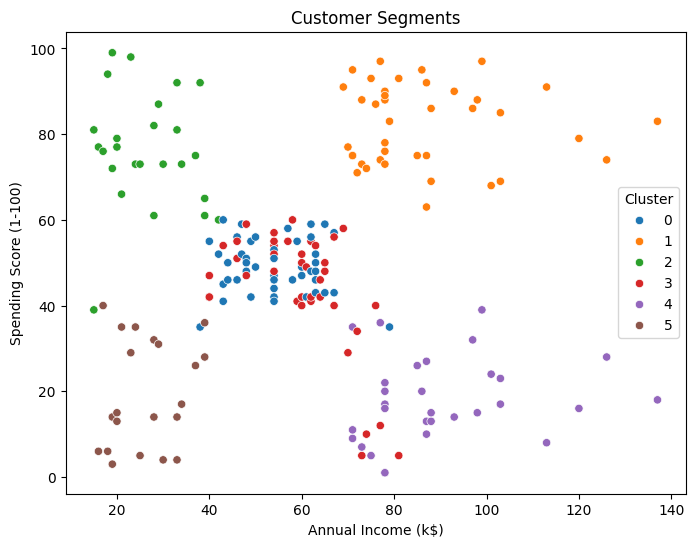

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10'
)
plt.title("Customer Segments")
plt.show()



In [37]:
# Cluster interpretation
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
cluster_summary



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,83.777778,56.333333,54.266667,49.066667
1,162.000000,32.692308,86.538462,82.128205
2,24.200000,25.560000,26.480000,76.240000
3,97.700000,26.125000,59.425000,44.450000
4,167.066667,44.000000,90.133333,17.933333
5,23.190476,45.523810,26.285714,19.380952


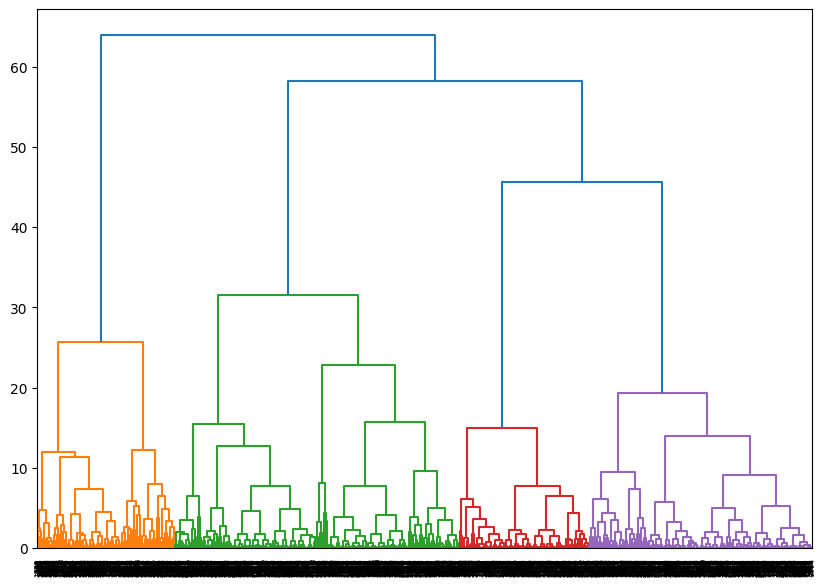

In [97]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.show()
